### Load UGRID

In [1]:
from gridgeo import GridGeo

url = ("http://crow.marine.usf.edu:8080/thredds/dodsC/"
       "FVCOM-Nowcast-Agg.nc")

url = ("../gridgeo/tests/data/FVCOM-Nowcast-Agg.nc")

ugrid = GridGeo(url, precision=2)

### Load SGRID

In [2]:
url = ("http://geoport.whoi.edu/thredds/dodsC/clay/usgs/users/jcwarner/"
       "Projects/Sandy/triple_nest/00_dir_NYB05.ncml")

url = "../gridgeo/tests/data/00_dir_NYB05.nc"

sgrid = GridGeo(url)

### The grid object has the same `__repr__` as shapely

Showing the whole grid is quite expensive!!!

In [ ]:
ugrid

In [ ]:
sgrid

/home/filipe/.virtualenvs/iris/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


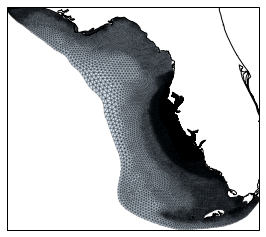

In [3]:
%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from descartes import PolygonPatch

bounds = ugrid.polygons.bounds
extent = bounds[0], bounds[2], bounds[1], bounds[3]

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent(extent)

for poly in ugrid.polygons:
    ax.add_patch(PolygonPatch(poly, facecolor='#6699cc', edgecolor='k', alpha=0.25))

ax.coastlines('10m');

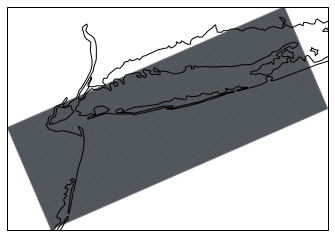

In [4]:
bounds = sgrid.polygons.bounds
extent = bounds[0], bounds[2], bounds[1], bounds[3]

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent(extent)

for poly in sgrid.polygons:
    ax.add_patch(PolygonPatch(poly, facecolor='#6699cc', edgecolor='k', alpha=0.25))

ax.coastlines('10m');

### The properties are:

In [5]:
ugrid.grid  # The `py{u,s}grid` object.

In [6]:
ugrid.mesh_name  # Grid name

u'fvcom_mesh'

In [7]:
ugrid.nc  # Reference to the netCDF file/URL path or object.

'../gridgeo/tests/data/FVCOM-Nowcast-Agg.nc'

In [8]:
type(ugrid.polygons)  # The polygons

shapely.geometry.multipolygon.MultiPolygon

### The methods are:

In [9]:
properties = dict(fill='#fd7d11',
                  fill_opacity=0.2,
                  stroke_opacity=1,
                  popupContent=ugrid.mesh_name)

geojson = ugrid.grid2geojson(**properties)

type(geojson)

dict

In [10]:
shape = ugrid.grid2shapely()

type(shape)

shapely.geometry.multipolygon.MultiPolygon

### There will be a CLI utility to save the files

In [11]:
import json

kw = dict(sort_keys=True, indent=4, separators=(',', ': '))
with open('ugrid.geojson','w') as f:
    json.dump(geojson, f, **kw)

In [12]:
import json

geojson = sgrid.grid2geojson(**properties)

kw = dict(sort_keys=True, indent=4, separators=(',', ': '))
with open('sgrid.geojson','w') as f:
    json.dump(geojson, f, **kw)